In [ ]:
import matplotlib.pyplot as plt

# Matplotlib
Строчка импорта наверху подключает matplotlib

**matplotlib** - проверенная временем библиотека научной визуализации данных для python. Может рисовать графики по-разному: в своем окне, в графический файл, в браузере.

Что читать про matplotlib: https://pyprog.pro/mpl/mpl_short_guide.html

Официальная документация: https://matplotlib.org/stable/

## Основные части Matplotlib и два подхода к рисованию
Основные объекты: 

- `figure` — "иллюстрация", главный контейнер для графиков, может содержть несколько графиков, создаваемых при помощи `subplot`;
- `axes` — "оси", отдельный график со своими осями, настройками и т. д.

В работе с matplotlib можно применять два подхода: 

1. _объектно-ориентированный_, когда вызываются методы иллюстраций или осей,
2. _императивный_, или _с состоянием_ (stateful),  когда библиотека помнит текущий объект, и вызовами функций библиотеки эти объекты создаются или настраиваются

In [ ]:
# ОО подход, методы объектов Figure или AxesSubplot

fig = plt.figure(figsize=(10,4)) # контейнер, а внутри него:
ax1 = fig.add_subplot(1, 2, 1)   # в сетке 1x2 первый график
ax2 = fig.add_subplot(1, 2, 2)   # в сетке 1x2 второй график

fig.set(facecolor = 'green')
fig.suptitle('Это — figure')

ax1.set(title = 'Это - оси ax_1', facecolor='#fff0f0')
ax1.set_xlabel('время')
ax1.set_ylabel('деньги')
ax1.grid(True)
ax1.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19])

ax2.set(title = 'Это - оси ax_2', xticks=[], yticks=[], facecolor='#f0f0ff')
ax2.set_xlabel('площадь')
ax2.set_ylabel('урожай')
ax2.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'orange')

plt.show()

In [ ]:
# Императивный подход - зовем функции из модуля pyplot
import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], linewidth=3)
plt.title('императивный подход')
plt.xlabel('время')
plt.show()

## Способы вызова и бэкенды
Что делает `plt.show()` — зависит от бэкенда. Проверьте текущий:

In [ ]:
import matplotlib
matplotlib.get_backend()

При вызове matplotlib из обычного Python с командной строки бэкенд будет оконный, например, TkAgg. При вызове появится интерактивное окно, где можно будет двигать, приближать и отдалять график, а также сохранять график в любом из поддерживаемых форматов:

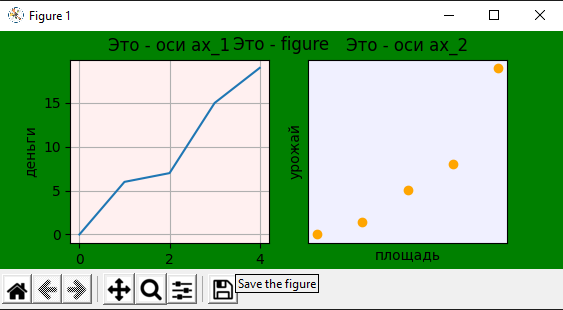

Попробуйте запустить с командной строки файл mplexample.py  в текущей папке:

     python mplexample.py 
     
Появится изображенное выше окно, а в командной строке - наименование бэкенда.

Для ipython/Jupyter Notebook есть magic-команда

     %matplotlib <бэкенд>
     
которая переключает бэкенд. По умолчанию используется `inline`, что подходит для концепции блокнота с картинками. Он выключает интерактивную функциональность. Для javascript-приближения к интерактивному окну используется бэкенд notebook. 

**ВНИМАНИЕ: команда `%matplotlib inline/%matplotlib notebook` должна быть выполнена до импорта pyplot!**

Вставьте строку

     %matplotlib notebook

в самое начало самой первой клетки. Сохраните и перезапустите (restart kernel) и сравните поведение графиков.

Интерактивное поведение пригодится для 3d графиков, которые хорошо вопринимаются в динамике.

## Графики

Общий принцип понятен. Есть 

1. методы для создания различных видов графиков: `plot`, `scatter`, `bar`, `contour` (см. первую ссылку для подробного знакомства с наиболее популярными возможностями), и 

2. методы объекта "оси" для настройки графика (метки, легенда. заголовки, сетка и т.д.). 

Методы для каждого из типов графиков обычно принимают обязательные парамаетры, задающие данные, и широкий набор необязательных именованных (keyword) параметров, которыми можно настроить отображение: цвет, толщину линий и т.п.

Определим общие данные для двумерного графика

In [ ]:
import numpy as np

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) / 2

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Контурный график - для функции двух переменных')
contour = ax.contour(X, Y, Z)
ax.grid(True)
ax.clabel(contour, inline=True, fontsize=10)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Заполненный контурный график')
contour = plt.contourf(X, Y, Z, levels=30, cmap='jet')
plt.show()

## 3d-графика
3D графики разрабатывались отдельно и значительно позже основной части matplotlib. С ними до сих пор не все идеально. Для восприятия лучше интерактивность, перезапустите если еще не перезапускали, ядро и выполните `%matplotlib notebook`  перед импортом Pyplot.

In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(X, Y, Z)
plt.show()

## Анимация

FuncAnimation принимат функцию, которая перестраивает график в зависимости от единственного параметра — номера кадра. В примере ниже используется иметод set_data, который заменяет данные уже построенного графика типа `plot`

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

t = np.linspace(0, 2 * np.pi, 200)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0, 2 * np.pi, -2, 2])
l, = ax.plot([], [])

def animate(i):
    l.set_data(t[:i], x[:i])
    
fps = 30 # frame per sec

ani = animation.FuncAnimation(fig, 
                              animate, 
                              frames=len(t), 
                              interval=1000.0 / fps)

## Интерактивные данные для графиков
Пример ниже показывает возможности интеграции интерактивных управляющих элементов для графиков. 
**Требуется наличие установленного пакета scipy**

In [ ]:
import scipy.integrate # For integration.
from ipywidgets import interactive # Allows for an interactive widget bar.

S0 = 0.95
I0 = 0.05
R0 = 0.0

def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    return([dS_dt, dI_dt, dR_dt,])
    
def interactive_func(beta, gamma):    
    # Graph from 0 to 100, include 10000 points.
    t = np.linspace(0, 100, 10000) 
    
    solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
    solution = np.array(solution)

    plt.figure(figsize=[8, 5])

    plt.plot(t, solution[:, 0], label="S(t)")
    plt.plot(t, solution[:, 1], label="I(t)")
    plt.plot(t, solution[:, 2], label="R(t)")

    plt.grid()
    plt.legend()

    plt.title("SIR Model")
    plt.xlabel("Time")
    plt.ylabel("Proportions of Populations")
    

interactive_plot = interactive(interactive_func, 
                               beta=(0.35,1,0.01), 
                               gamma=(0.1,1,0.01))
interactive_plot